### Final project 
Rebecca McHugh

In [1]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import folium

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the directory exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [3]:
# Import csv files for temperature data. 
temp_dir = glob(os.path.join('temperature-data', '*'))
temp_dir

['temperature-data/#008 2022-11-11 09_30_30 MST (Data MST).csv',
 'temperature-data/#041 2022-11-17 12_40_44 MST (Data MST).csv',
 'temperature-data/#035 2022-11-11 10_11_52 MST (Data MST).csv',
 'temperature-data/#037 2022-11-07 10_28_44 MST (Data MST).csv',
 'temperature-data/#011 2022-11-11 16_02_23 MST (Data MST).csv',
 'temperature-data/#006 2022-11-11 11_15_51 MST (Data MST).csv',
 'temperature-data/#009 2022-11-11 09_38_41 MST (Data MST).csv',
 'temperature-data/#004 2022-11-11 10_52_49 MST (Data MST).csv',
 'temperature-data/#022 2022-11-11 12_11_57 MST (Data MST).csv',
 'temperature-data/#018 2022-11-11 13_23_57 MST (Data MST).csv',
 'temperature-data/#036 2022-11-11 10_19_19 MST (Data MST).csv',
 'temperature-data/#017 replacement  2022-11-11 16_11_43 MST (Data MST).csv',
 'temperature-data/#019 replacement  2022-11-11 13_12_35 MST (Data MST).csv',
 'temperature-data/#043 2022-11-07 09_56_38 MST (Data MST).csv',
 'temperature-data/#001 2022-11-11 10_28_13 MST (Data MST).csv',

In [4]:
# Import one csv file.
def import_temp_csv(file_name):
    """
    Download an air temperature csv file.

    Function will allow a different csv file to be downloaded and edited to 
    required specifications.

    Paramterers.
    ----------
    file_name : str
      The name of the file.

    Returns
    --------
    Imported csv. 
        The requested and edited csv file.
    """

    # Read csv.
    downloaded_temp_csv = pd.read_csv(file_name,
                                      index_col='Date-Time (MST/MDT)',
                                      parse_dates=True)
    return downloaded_temp_csv

sensor_001 = import_temp_csv(
    'temperature-data/#001 2022-11-11 10_28_13 MST (Data MST).csv')
sensor_002 = import_temp_csv(
    'temperature-data/#002 2022-11-11 10_36_26 MST (Data MST).csv')
sensor_003 = import_temp_csv(
    'temperature-data/#003 2022-11-11 10_47_00 MST (Data MST).csv')
sensor_003

,#,Ch: 1 - Temperature (°C ),Host Connected,End of File
Date-Time (MST/MDT),,,,
2022-05-26 08:00:00,1,22.43,NaN,NaN
2022-05-26 08:05:00,2,22.35,NaN,NaN
2022-05-26 08:10:00,3,22.31,NaN,NaN
2022-05-26 08:15:00,4,22.13,NaN,NaN
2022-05-26 08:20:00,5,22.05,NaN,NaN
...,...,...,...,...
2022-11-11 10:25:00,48722,-0.69,NaN,NaN
2022-11-11 10:30:00,48723,-0.47,NaN,NaN
2022-11-11 10:35:00,48724,-0.17,NaN,NaN


In [ ]:
# # Import a few sensors using a for loop. 
# # Compute lists of file names.
# file_path = [temp_dir]
# files_list = {}
# # Open the files using the function we wrote. 
# for file_path in file_paths:
#     files_list[files] = import_temp_csv
#     print(file)

In [5]:
# Function to convert celsius to fahrenheit
def celsius_to_fahr(temp_c):
    temp_fahr = (temp_c * 1.8) + 32
    return temp_fahr

In [6]:
# Create a function to edit imported csv.
def edit_imported_temp_csv(sensor_number):
    """Edit sensor data to the correct parameters."""
    # Delete unnecessary columns.
    sensor_number.drop(sensor_number.columns[[0, 2, 3]], axis=1, inplace=True)
    # Rename column headers.
    sensor_number.index.names = ['date_time']
    sensor_number.columns.values[0] = "temp_celsius"
    # Convert degrees celsius to degrees fahrenheit.
    sensor_number["temp_fahrenheit"] = celsius_to_fahr(
        sensor_number["temp_celsius"])
    # Remove temp_celsius column.
    sensor_number.drop(sensor_number.columns[[0]], axis=1, inplace=True)
    return sensor_number
edit_imported_temp_csv(sensor_002) 
edit_imported_temp_csv(sensor_003)

,temp_fahrenheit
date_time,
2022-05-26 08:00:00,72.374
2022-05-26 08:05:00,72.230
2022-05-26 08:10:00,72.158
2022-05-26 08:15:00,71.834
2022-05-26 08:20:00,71.690
...,...
2022-11-11 10:25:00,30.758
2022-11-11 10:30:00,31.154
2022-11-11 10:35:00,31.694


In [ ]:
# Calculate the daily mean. 
def daily_mean (sensor_number):
    mean_temp_daily = sensor_number.iloc[0].resample('D').mean()
    #mean_temp_daily = sensor_number(sensor_number.resample['D'].count())
daily_mean(sensor_003)

In [7]:
# Name the sensor for formatting purposes.
# def sensor_number_name ():
# Create a gdf of the sensor name and location.
sensor_sites_list = pd.DataFrame(
    {'sensor_name': ['sensor_001',
                     'sensor_002',
                     'sensor_003',
                     'sensor_004',
                     'sensor_005',
                     'sensor_006',
                     'sensor_007',
                     'sensor_008',
                     'sensor_009',
                     'sensor_010',
                     'sensor_011',
                     'sensor_012',
                     'sensor_013',
                     'sensor_014',
                     'sensor_015',
                     'sensor_016',
                     'sensor_017',
                     'sensor_018',
                     'sensor_019',
                     'sensor_020',
                     'sensor_021',
                     'sensor_022',
                     'sensor_023',
                     'sensor_024',
                     'sensor_025',
                     'sensor_026',
                     'sensor_027',
                     'sensor_028',
                     'sensor_029',
                     'sensor_030',
                     'sensor_031',
                     'sensor_032',
                     'sensor_033',
                     'sensor_034',
                     'sensor_035',
                     'sensor_036',
                     'sensor_037',
                     'sensor_038',
                     'sensor_039',
                     'sensor_040',
                     'sensor_041',
                     'sensor_042',
                     'sensor_043'],
     'latitude': [40.01529,
                  40.02051,
                  40.0272858,
                  40.0288062,
                  40.056943,
                  40.05773,
                  40.05564,
                  40.00722,
                  40.0090042,
                  39.97694,
                  39.99494,
                  39.99988,
                  40.0028563,
                  40.01493,
                  40.01512,
                  40.0731603,
                  39.98402,
                  40.03176,
                  40.044624,
                  40.043928,
                  40.086,
                  40.054629,
                  40.07784,
                  40.064132,
                  40.06213,
                  40.0332328,
                  40.01667,
                  40.0111700,
                  40.018508,
                  39.9730290,
                  40.0118932,
                  39.99735,
                  39.9987025,
                  39.9999017,
                  40.0139711,
                  40.0134418,
                  39.934941,
                  40.037323,
                  40.026377,
                  40.0120372,
                  40.21291,
                  40.04429,
                  40.0257],
     'longitude': [-105.28639,
                   -105.29113,
                   -105.2872161,
                   -105.2875383,
                   -105.290043,
                   -105.2883,
                   -105.28424,
                   -105.27949,
                   -105.2843139,
                   -105.26022,
                   -105.23594,
                   -105.22941,
                   -105.2516369,
                   -105.23615,
                   -105.22528,
                   -105.2020412,
                   -105.23961,
                   -105.24959,
                   -105.246515,
                   -105.244840,
                   -105.21118,
                   -105.262655,
                   -105.28233,
                   -105.284495,
                   -105.28199,
                   -105.2754479,
                   -105.2504,
                   -105.2542729,
                   -105.256018,
                   -105.2495512,
                   -105.2675196,
                   -105.29921,
                   -105.2959701,
                   -105.2957703,
                   -105.2850948,
                   -105.2941583,
                   -105.266901,
                   -105.292483,
                   -105.224478,
                   -105.2723530,
                   -105.27719,
                   -105.29278,
                   -105.2898]})
sensor_sites_list.set_index('sensor_name', inplace=True)

sensor_sites_list.head()

,latitude,longitude
sensor_name,,
sensor_001,40.015290,-105.286390
sensor_002,40.020510,-105.291130
sensor_003,40.027286,-105.287216
sensor_004,40.028806,-105.287538
sensor_005,40.056943,-105.290043


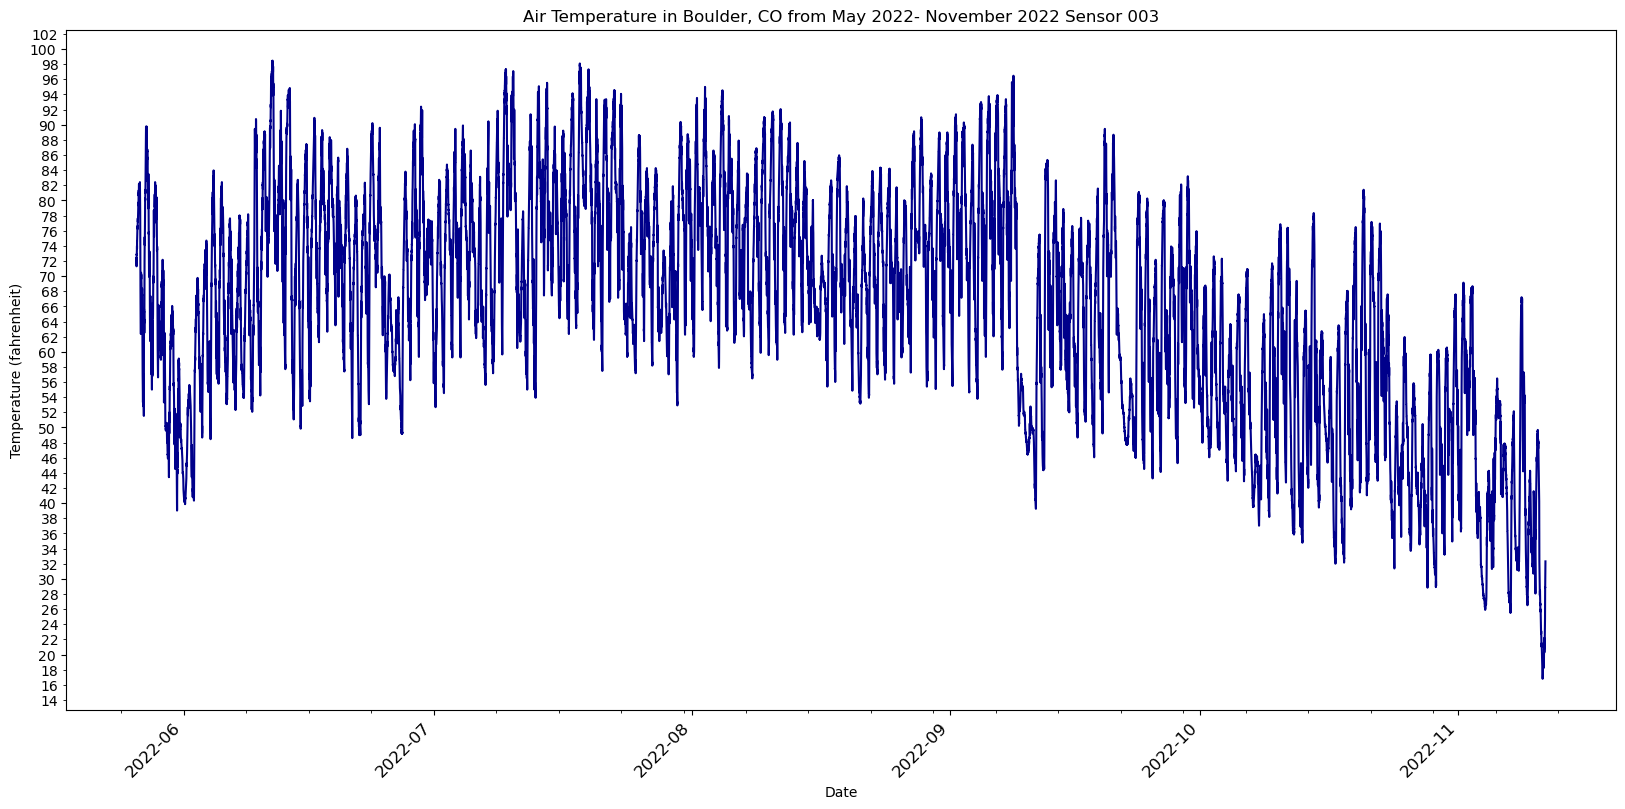

In [8]:
# Create a plot for air temperature for each reading.
def plot_temp_minute(sensor_number, title):
    # Create plot layout.
    ig, (ax1) = plt.subplots(
        1, figsize=(20, 10))
    ax = ax1
    # Add information to plot.
    sensor_number['temp_fahrenheit'].plot(
        ax=ax1,
        rot=60,
        title=title,
        xlabel='Date',
        ylabel='Temperature (fahrenheit)',
        color='darkblue',
        legend='')
    # Adjust tick marks on the x-axis.
    ax1.tick_params(axis='x', labelrotation=45, labelsize='large')
    # Add minor ticks in between larger ticks and label minor ticks.
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.f"))
    # Add more ticks for the date axis.


plot_temp_minute(sensor_003,
                 'Air Temperature in Boulder, CO from May 2022'
                 '- November 2022 Sensor 003')

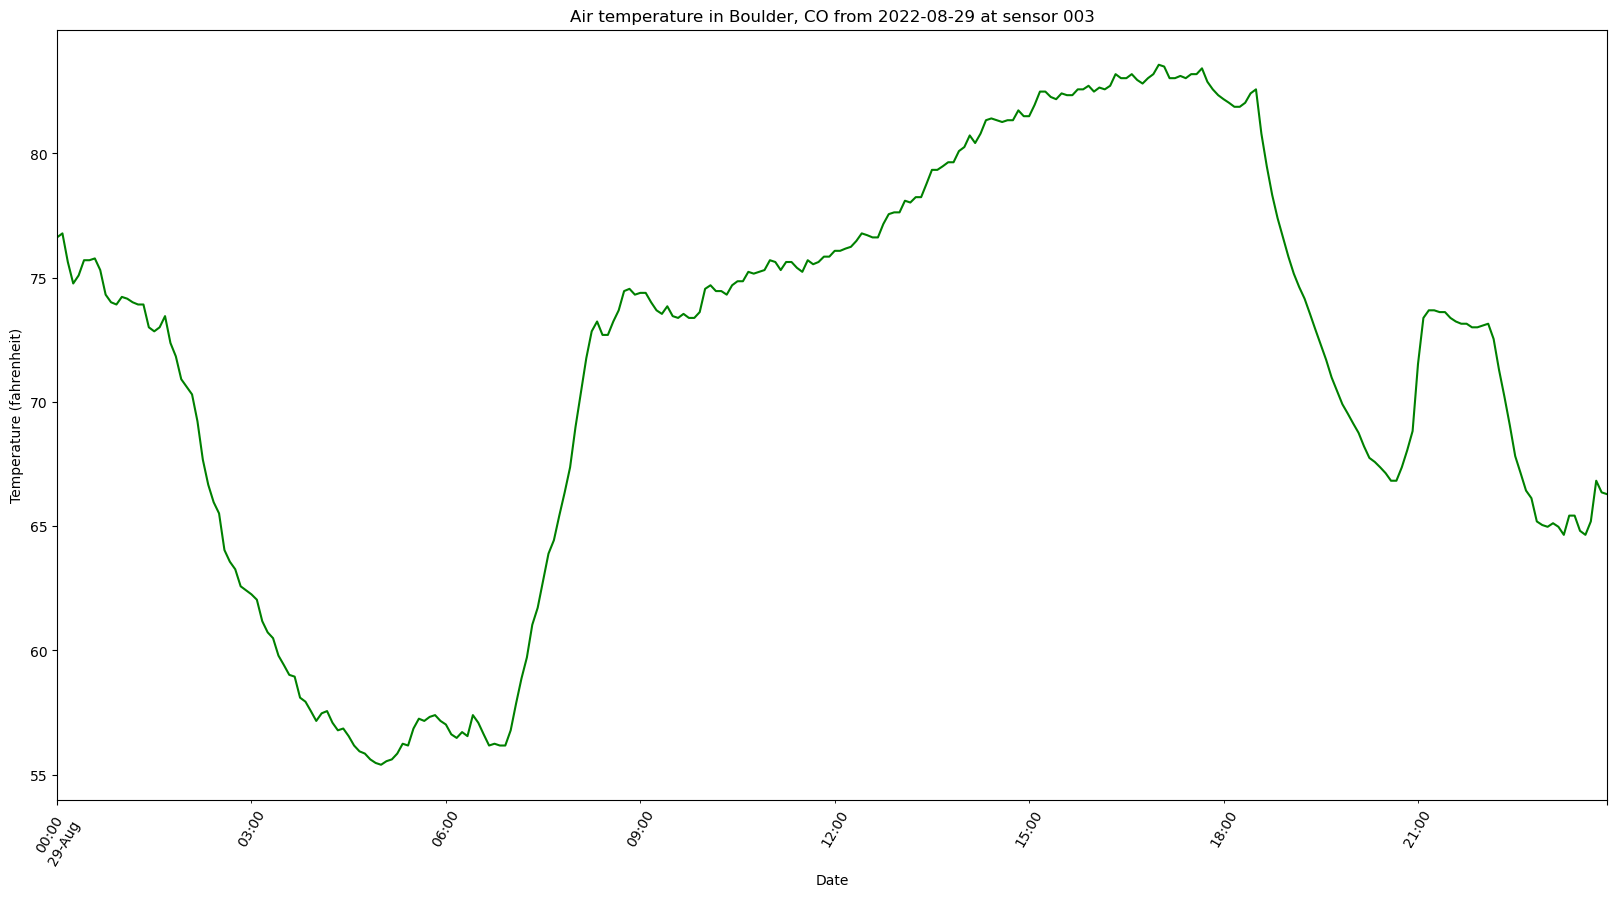

In [21]:
# Create a plot to graph just a single day. 
def plot_temp_subset_date(sensor_number, date, title):
    # Subset the data to preferred number
    sensor_subset = sensor_number.loc[date]
    # Create plot layout.
    ig, (ax1) = plt.subplots(
        1, figsize=(20, 10))
    ax = ax1
    # Add information to plot.
    sensor_subset['temp_fahrenheit'].plot(
        ax=ax1,
        rot=60,
        title=title,
        xlabel='Date',
        ylabel='Temperature (fahrenheit)',
        color='green',
        legend='')
    
plot_temp_subset_date(sensor_003,
                      '2022-08-29',
                      'Air temperature in Boulder, CO'
                      ' from 2022-08-29 at sensor 003')

In [31]:
# Create a graph to plot a couple months. 
x=sensor_002['temp_fahrenheit']
y=sensor_002['date_time']
plt.plot(x,y)
plt.show()

KeyError: 'date_time'

In [ ]:
# Create one plot with two sensors
def plot_temp_minute_two(sensor_number_1, sensor_number_2):
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True

    df1 = sensor_number_1
    df2 = sensor_number_2

    ax = df1.plot(color='green', label='sensor 1')
    df2.plot(ax=ax, color='lightgrey', label='sensor 2')

    plt.show()
    
plot_temp_minute_two(sensor_002, sensor_003)

In [ ]:
# Create a map of the sensors. 
sensor_map = folium.Map(
    location=[40.0150, -105.2705],
    zoom_start=12,
    tiles='Stamen terrain')
sensor_map

# for site_name, site_df in discharge_df.grouby('site_name'):
#     print([site_df.latitude.unique(), site_df.longitude.unique()])
#     (folium.Marker([site_df.latitude.unique(), site_df.longitude.unique()]
#                   .add_to(sensor_map)))
    
for sensor_name, site_df in sensor_sites_list.groupby('sensor_name'):
    print([site_df.latitude.unique(), site_df.longitude.unique()])
    (folium.Marker([site_df.latitude.unique(), site_df.longitude.unique()]
                  .add_to(sensor_map)))
    

In [ ]:
# ADDITIONAL 
# # Create a function to edit imported csv.
# def edit_imported_temp_csv(sensor_number):
#     """Edit sensor data to the correct parameters."""
#     # Delete unnecessary columns.
#     sensor_number.drop(sensor_number.columns[[0, 3, 4]], axis=1, inplace=True)
#     # Rename column headers.
#     sensor_number.columns.values[0] = "date_time"
#     sensor_number.columns.values[1] = "temp_celsius"
#     # Split date and time into seperate columns.
#     sensor_number['Date'] = pd.to_datetime(sensor_number['date_time']).dt.date
#     sensor_number['Time'] = pd.to_datetime(sensor_number['date_time']).dt.time
#     # Remove date_time column.
#     sensor_number.drop(sensor_number.columns[[0]], axis=1, inplace=True)
#     # Convert degrees celsius to degrees fahrenheit.
#     sensor_number["temp_fahrenheit"] = celsius_to_fahr(
#         sensor_number["temp_celsius"])
#     # Remove temp_celsius column.
#     sensor_number.drop(sensor_number.columns[[0]], axis=1, inplace=True)
#     # Set Date column as index. 
#     sensor_number.set_index('Date', inplace=True)
#     return sensor_number
# edit_imported_temp_csv(sensor_002)

# TRY TO TAKE DAILY MEAN 
 # Take the daily average temperature.
#     sensor_003.groupby(pd.PeriodIndex(sensor_003['date_time'],
#                                       freq="D"))['temp_fahrenheit'].mean()
# sensor_002
# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

# df1 = sensor_002
# df2 = sensor_003

# ax = df1.plot()
# df2.plot(ax=ax)

# plt.show()
sensor_003